In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
from scipy.stats import norm


In [2]:
train = pd.read_csv('C:/Users/Raj/Downloads/Data Mining/train.csv')
test = pd.read_csv('C:/Users/Raj/Downloads/Data Mining/test.csv')
print("Total number of samples in train file : ", train.shape[0])
print("Total number of samples in test file : ", test.shape[0])

Total number of samples in train file :  1458644
Total number of samples in test file :  625134


In [3]:
print("A view of the train dataframe")
print(train.head())
print("\nColumns in train dataset : ", train.columns)
print("\n")
print("Overall description of the train dataset : ")
print(train.info())

A view of the train dataframe
          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N    

In [4]:
train_id = set(train['id'].values)
test_id = set(test['id'].values)
print("Number of unique id in train dataset : ", len(train_id))
print("Number of unique id in test dataset : ", len(test_id))
common_ids = train_id.intersection(test_id)
print("Number of common id in the train and test datasets : ", len(common_ids))

Number of unique id in train dataset :  1458644
Number of unique id in test dataset :  625134
Number of common id in the train and test datasets :  0


In [5]:
target = train['trip_duration']
print("Longest trip duration {} or {} minutes: " .format(np.max(target.values), np.max(target.values)//60))
print("Smallest trip duration {} or {} minutes: ".format(np.min(target.values),np.min(target.values)//60))
print("Average trip duration : {} or {} minutes".format(np.mean(target.values), np.mean(target.values)//60))

Longest trip duration 3526282 or 58771 minutes: 
Smallest trip duration 1 or 0 minutes: 
Average trip duration : 959.4922729603659 or 15.0 minutes


Number of unique vendors :  2
How popular is the vendor? 


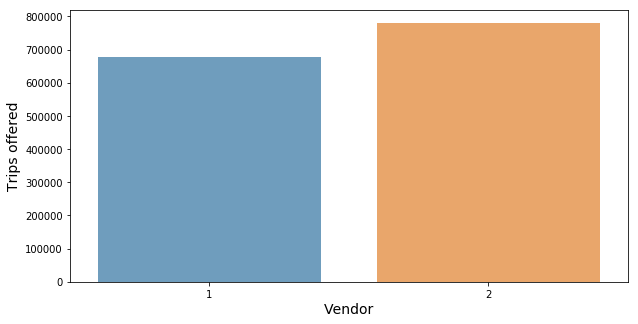

In [6]:
unique_vendors = set(train['vendor_id'].values)
print("Number of unique vendors : ", len(unique_vendors))
print("How popular is the vendor? ")
vendor_popularity = train['vendor_id'].value_counts()

f = plt.figure(figsize=(10,5))
sns.barplot(vendor_popularity.index, vendor_popularity.values, alpha=0.7)
plt.xlabel('Vendor', fontsize=14)
plt.ylabel('Trips offered', fontsize=14)
plt.show()

Maximum number of passengers on a trip :  9
Minimum number of passengers on a trip :  0
Average number of passengers on a trip :  1.6645295219395548


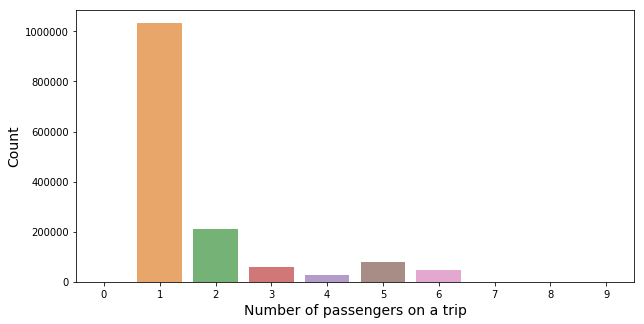

In [7]:
pass_count = train['passenger_count']
print("Maximum number of passengers on a trip : ", np.max(pass_count.values))
print("Minimum number of passengers on a trip : ", np.min(pass_count.values))
print("Average number of passengers on a trip : ", np.mean(pass_count.values))

f = plt.figure(figsize=(10,5))
pass_count = train['passenger_count'].value_counts()
sns.barplot(pass_count.index, pass_count.values, alpha=0.7)
plt.xlabel('Number of passengers on a trip', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

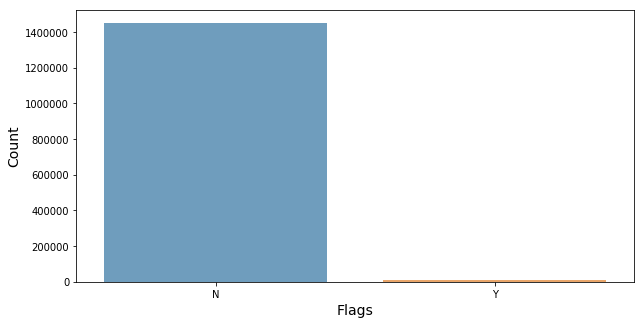

In [8]:
flags = train['store_and_fwd_flag'].value_counts()

f = plt.figure(figsize=(10,5))
sns.barplot(flags.index, flags.values, alpha=0.7)
plt.xlabel('Flags', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [17]:
trip_time = train['trip_duration']/60

C:\Users\Raj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


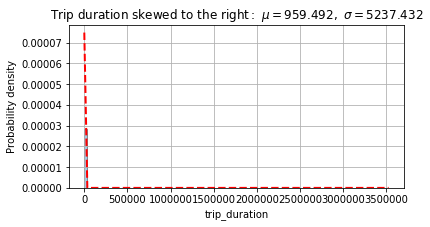

,count,mean,std,min,25%,50%,75%,max
trip_duration,1458644.0,959.492273,5237.431724,1.0,397.0,662.0,1075.0,3526282.0


In [21]:
import matplotlib.mlab as mlab
# Mean distribution
mu = train['trip_duration'].mean()

# Std distribution
sigma = train['trip_duration'].std()
num_bins = 100

# Histogram 
fig = plt.figure(figsize=(6, 3))
n, bins, patches = plt.hist(train['trip_duration'], num_bins, normed=1,
                           edgecolor = 'black', lw = 1, alpha = .40)
# Normal Distribution
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('trip_duration')
plt.ylabel('Probability density')

# Adding a title
plt.title(r'$\mathrm{Trip\ duration\ skewed \ to \ the \ right:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
plt.grid(True)
#fig.tight_layout()
plt.show()

# Statistical summary
train.describe()[['trip_duration']].transpose()

In [11]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_month'] = train['pickup_datetime'].dt.month
train['pickup_weekday'] = train['pickup_datetime'].dt.weekday
train['pickup_hour'] = train['pickup_datetime'].dt.hour

train['drop_day'] = train['dropoff_datetime'].dt.day
train['drop_month'] = train['dropoff_datetime'].dt.month
train['drop_weekday'] = train['dropoff_datetime'].dt.weekday
train['drop_hour'] = train['dropoff_datetime'].dt.hour

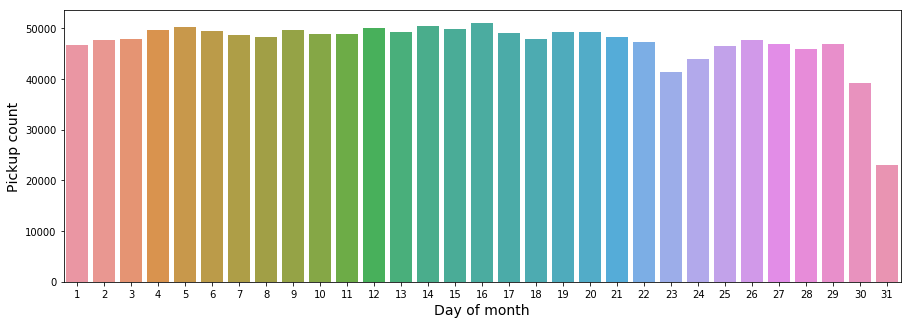

In [12]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_day', data=train)
plt.xlabel('Day of month', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

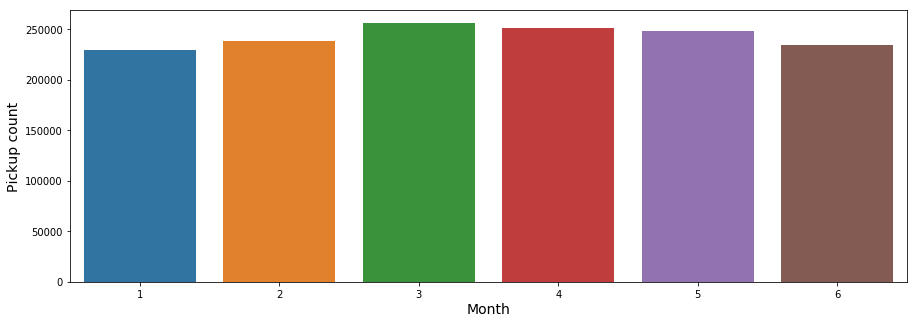

In [13]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_month', data=train)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

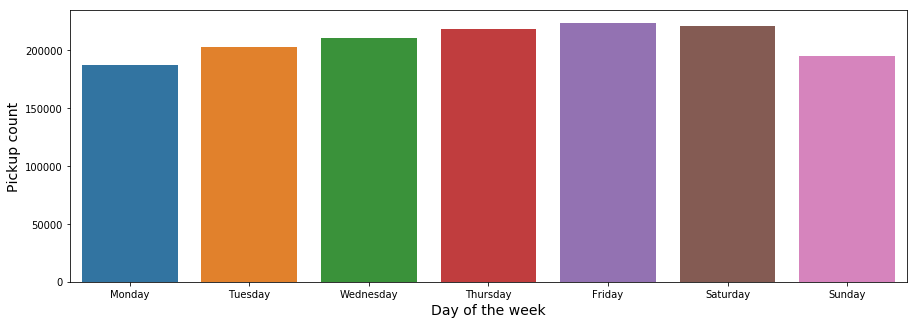

In [14]:
f = plt.figure(figsize=(15,5))
days = [i for i in range(7)]
sns.countplot(x='pickup_weekday', data=train)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

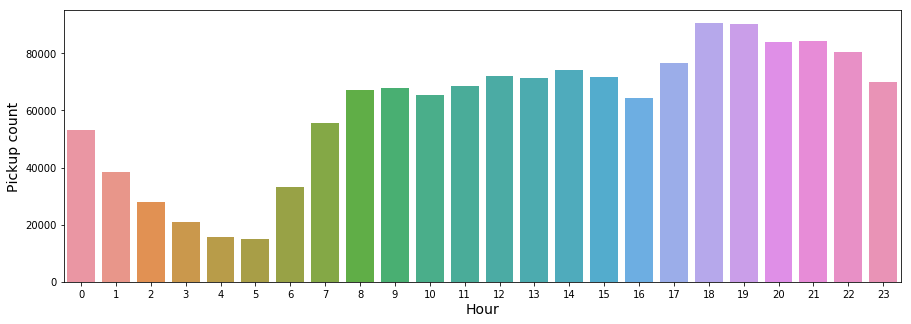

In [15]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_hour', data=train)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

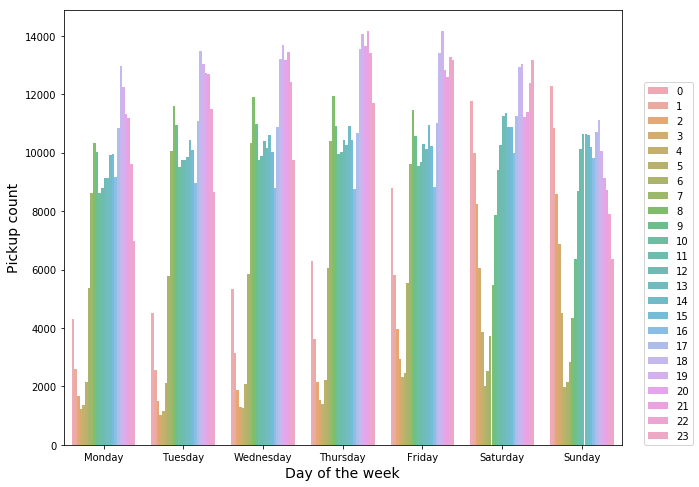

In [16]:
f = plt.figure(figsize=(10,8))
days = [i for i in range(7)]
sns.countplot(x='pickup_weekday', data=train, hue='pickup_hour', alpha=0.8)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend(loc=(1.04,0))
plt.show()

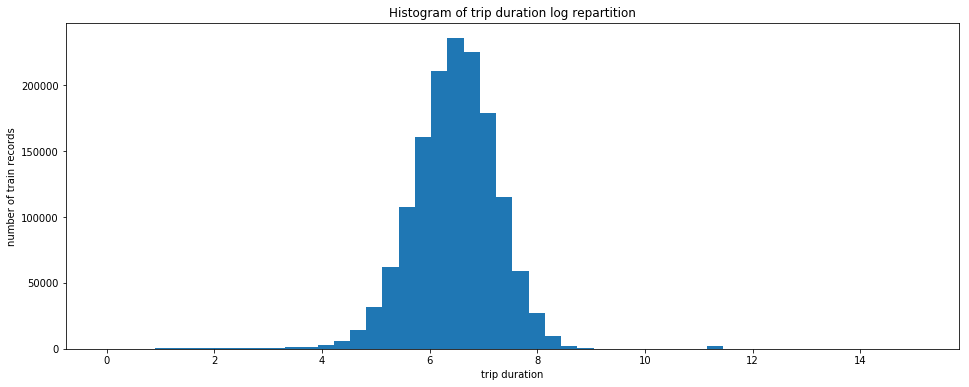

In [19]:
plt.subplots(figsize=(16,6))
train['trip_duration_log'] = np.log(train['trip_duration'].values)
plt.hist(train['trip_duration_log'], bins=50)
plt.xlabel('trip duration')
plt.ylabel('number of train records')
plt.title('Histogram of trip duration log repartition')
plt.show();

Text(0.5, 1.0, 'Concentration of trips in NY')

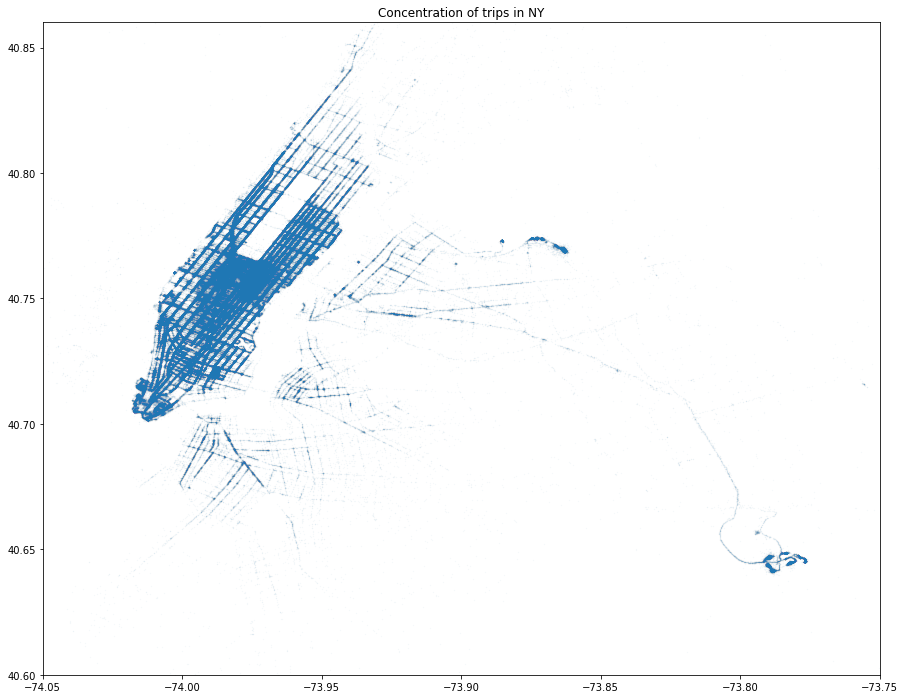

In [21]:
fig, ax = plt.subplots(figsize=(15,12))
ax.scatter(train['pickup_longitude'],train['pickup_latitude'], s=0.0002, alpha=1);
plt.ylim(40.6, 40.86)
plt.xlim(-74.05,-73.75)
plt.title('Concentration of trips in NY')

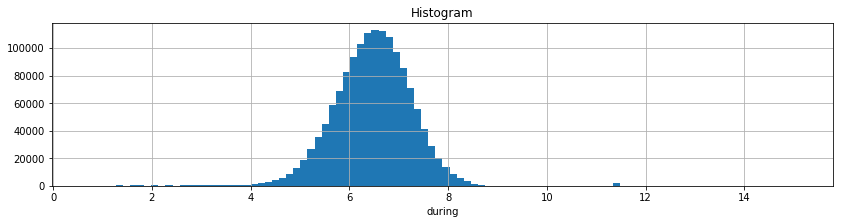

In [23]:
y = np.log1p(train['trip_duration'])
y.hist(bins=100, figsize=(14,3))
plt.xlabel('during')
plt.title('Histogram');

In [22]:
train['pickup_date'] = train['pickup_datetime'].dt.date # Extract date

AttributeError: Can only use .dt accessor with datetimelike values

In [24]:
pickups_by_day = train.groupby('pickup_date').count()['id']

# Create graph
pickups_graph = pickups_by_day.plot(x = 'pickup_date', y = 'id', figsize = (8.5,5),legend = True)

# Customize tick size
pickups_graph.tick_params(axis = 'both', which = 'major', labelsize = 12)

# Bold horizontal line at y = 0
pickups_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# Customize tick labels of the y-axis
#pickups_graph.set_yticklabels(labels = [-10, '2000   ', '4000   ', '6000   ', '8000   ', '10000   '])

# Add an extra vertical line by tweaking the range of the x-axis
pickups_graph.set_xlim(left = '2015-12-31', right = '2016-06-30')

# Remove the label of the x-axis
pickups_graph.xaxis.label.set_visible(False)

# Add signature bar
pickups_graph.text(x = '2015-12-15', # Adjusts left side of signature bar,has to be in same coordiantes as x-axis
               y = -2500, 
               s = '    ©KAGGLE                                          Source: NYC Taxi and Limousine Commission (TLC)   ', # copyright symbol ALT + 0169
              fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
pickups_graph.text(x = '2015-12-18', y = 11800,
                   s = "Dramatic drop in total trips in late January or early February",
                   fontsize = 20, weight = 'bold', alpha = .90)

pickups_graph.text(x = '2015-12-18', y = 11000, 
                   s = 'Decline is isolated to a specific day so may be more than just seasonal effects.',
                   fontsize = 14, alpha = .85)
pickups_graph.text(x = '2016-01-27', y = 1500, s = 'What happened?',weight = 0, rotation = 0, backgroundcolor = '#f0f0f0', size = 14)
plt.show()

KeyError: 'pickup_date'